#Bài 6

In [ ]:
#import các thư viện
import numpy as np
import pandas as pd
import seaborn as sns

df = pd.read_csv("https://raw.githubusercontent.com/ltdaovn/dataset/master/obesity.csv", index_col = 0)
df

,gender,height,weight,bmi,age,WBBMC,wbbmd,fat,lean,pcfat
id,,,,,,,,,,
1,F,150,49,21.8,53,1312,0.88,17802,28600,37.3
2,M,165,52,19.1,65,1309,0.84,8381,40229,16.8
3,F,157,57,23.1,64,1230,0.84,19221,36057,34.0
4,F,156,53,21.8,56,1171,0.80,17472,33094,33.8
5,M,160,51,19.9,54,1681,0.98,7336,40621,14.8
...,...,...,...,...,...,...,...,...,...,...
1223,F,150,44,19.6,44,1474,0.95,12906,28534,30.1
1224,F,148,51,23.3,58,1522,0.97,14938,33931,29.6
1225,F,149,50,22.5,57,1409,0.93,16777,30598,34.4


#a. Hãy vẽ box plot thể hiện sự phân bố tỷ trọng mỡ (pcfat) theo từng nhóm giới tính.

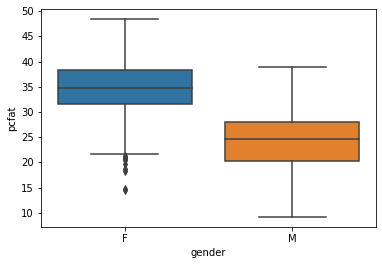

In [ ]:
sns.boxplot(x='gender', y='pcfat', data = df)

#b. Hãy vẽ box plot thể hiện sự phân bố tỷ trọng mỡ (pcfat) theo từng nhóm giới tính và nhóm tuổi. Tuổi được chia thành các nhóm:

#Thêm cột ageg (nhóm tuổi)

In [ ]:
def g(row):
  if row['age'] < 40:
    val = 1
  elif row['age'] >=40 and row['age'] <50:
    val = 2
  elif row['age'] >=50 and row['age'] <60:
    val = 3
  else:
    val = 4
  return val

In [ ]:
df['ageg'] = df.apply(g, axis=1)

In [ ]:
df
#ageg = 1: dưới 40 tuổi
#ageg = 2: từ 40 đến dưới 50 tuổi
#ageg = 3: từ 50 đến dưới 60 tuổi
#ageg = 4: từ 60 tuổi trở lên

,gender,height,weight,bmi,age,WBBMC,wbbmd,fat,lean,pcfat,ageg
id,,,,,,,,,,,
1,F,150,49,21.8,53,1312,0.88,17802,28600,37.3,3
2,M,165,52,19.1,65,1309,0.84,8381,40229,16.8,4
3,F,157,57,23.1,64,1230,0.84,19221,36057,34.0,4
4,F,156,53,21.8,56,1171,0.80,17472,33094,33.8,3
5,M,160,51,19.9,54,1681,0.98,7336,40621,14.8,3
...,...,...,...,...,...,...,...,...,...,...,...
1223,F,150,44,19.6,44,1474,0.95,12906,28534,30.1,2
1224,F,148,51,23.3,58,1522,0.97,14938,33931,29.6,3
1225,F,149,50,22.5,57,1409,0.93,16777,30598,34.4,3


In [ ]:
df['ageg'].value_counts()

1    382
4    286
3    286
2    263
Name: ageg, dtype: int64

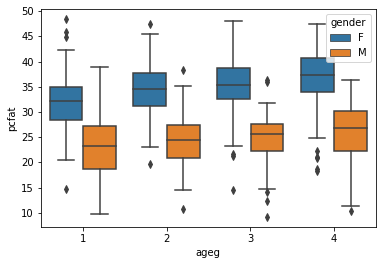

In [ ]:
sns.boxplot(x='ageg', y='pcfat', hue='gender', data=df)

#c. Hãy vẽ histogram thể hiện sự phân bố tỷ trọng mỡ (pcfat) theo từng nhóm giới tính. Gợi ý: dùng hàm seaborn.histplot với tham số common_norm=False.

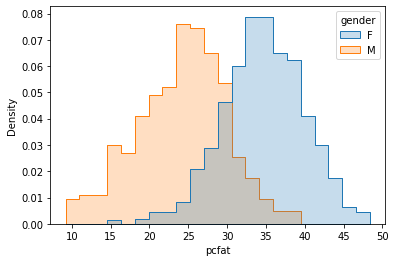

In [ ]:
sns.histplot(data = df, 
             x='pcfat', 
             hue = 'gender', 
             element='step',
             stat = 'density',
             common_norm = False)
             #chuẩn hóa từng biểu đồ 1 cách độc lập

'''sns.displot(data=df, 
              x="pcfat", 
              hue="gender", 
              kind="kde", 
              common_norm=False, 
              fill=True)'''

#d. Hãy vẽ biểu đồ thể hiện mối quan hệ giữa tuổi và mật độ xương (wbbmd) của từng nhóm giới tính. Dựa trên biểu đồ này, hãy cho nhận xét. Gợi ý: tuổi càng cao thì mật độ xương càng giảm hay càng tăng?

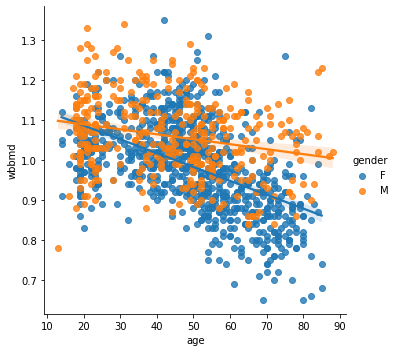

In [ ]:
sns.lmplot(x='age', 
           y='wbbmd',
           hue ='gender',
           data = df)

#mật độ xương của nam và nữ ở tuổi dưới 25 là không chênh lệch nhiều
#càng lớn tuổi thì cả nam và nữ đều có mật độ xương giảm đi.
#đặt biệt là ở nữ giảm rất nhanh so với nam ở tuổi 50.

#e. Hãy vẽ biểu đồ thể hiện mối quan hệ giữa chỉ số BMI (Body Mass Index hay còn gọi là chỉ số khối cơ thể) và tỷ trọng mỡ (pcfat) của từng nhóm giới tính. Dựa trên biểu đồ, hãy cho nhận xét.

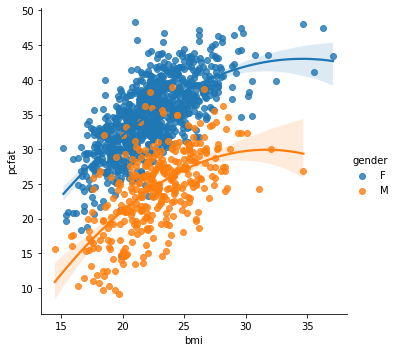

In [ ]:

g = sns.lmplot(x='bmi', 
           y='pcfat',
           hue='gender', 
           data = df,
           #Phương trình bậc 2
           order = 2)

#ở cả nam và nữ đều có tỷ trọng mỡ tăng lên nếu có chỉ số khối lượng cơ thể cao